# Statistical and Machine Learning Algorithms

## Multiple linear regression

Multiple linear regression is a technique used to train a linear model, that assumes that there are linear relationships between multiple predictor variables ($x$) and a continuous target variable ($y$). The general equation for a multiple linear regression with $m$ predictor variables is as follows:

$$
\hat{y} = \beta_0 + \beta_1x_1 +  \beta_2x_2 + \dots +  \beta_mx_m + \epsilon =  \beta_0 + \sum^m_{i=1} \beta_ix_i + \epsilon
$$

Training a linear regression model involves estimating the values of the coefficients for each of the predictor variables denoted by the letter $\beta$. In the preceding equation, $\epsilon$ denotes an error term, which is normally distributed, and has zero mean and constant variance. This is represented as follows:

$$
\epsilon \sim N(0, \theta^2)
$$

Various techniques can be used to build a linear regression model. The most frequently used is the ordinary least square (OLS) estimate. The OLS method is used to produce a linear regression line that seeks to minimize the sum of the squared error. The error is the distance from an actual data point to the regression line. The sum of the squared error measures the aggregate of the squared difference between the training instances, which are each of our data points, and the values predicted by the regression line. This can be represented as follows:

$$
\text{Error} = \sum^m_{i=1}(y_i - \hat{y})^2
$$
In the preceding equation, $y$ is the actual training instance and $\hat{y}$ is the value predicted by the regression line.

In the context of machine learning, gradient descent is a common technique that can be used to optimize the coefficients of predictor variables by minimizing the training error of the model through multiple iterations. Gradient descent starts by initializing the coefficients to zero. Then, the coefficients are updated with the intention of minimizing the error. Updating the coefficients is an iterative process and is performed until a minimum squared error is achieved.

In the gradient descent technique, a hyperparameter called the learning rate, denoted
by $\alpha$ is provided to the algorithm. This parameter determines how fast the algorithm moves toward the optimal value of the coefficients. If $\alpha$ is very large, the algorithm might skip the optimal solution. If it is too small, however, the algorithm might have too many iterations to converge to the optimum coefficient values. For this reason, it is important to use the right value for $\alpha$.

In this recipe, we will use the gradient descent method to train our linear regression model.

### Getting ready

In [1]:
# import os for operating system dependant functionalities
import os

# import other required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_housingdata = pd.read_csv("./Final_HousePrices.csv")

### How to do it

Let's move on to building our model. We will start by identifying our numerical and categorical variables. We study the correlations using the correlation matrix and the correlation plots.

In [2]:
# 1 First, we'll take a look

# see the variables and their data types
df_housingdata.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 80, dtype: object

In [3]:
# 2 we'll then look at the correlation matrix. The corr() method
# computes the pairwise() correlation of columns

# We pass 'pearson' as the method for calculating our correlation
df_housingdata.corr(method='pearson', numeric_only=True)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [4]:
# 3 Besides this, we'd also like to study the correlation between the predictor
# variables and the response variable

# we store the correlation matrix output in a variable
pearson = df_housingdata.corr(method='pearson', numeric_only=True)

# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.iloc[-1][:-1]

# attributes sorted from the most predictive
corr_with_target.sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

We may also want to sort our correlation by absolute values. In order to do this, we can use the following command: `corr_with_target[abs(corr_with_target).argsort()[::-1]]`

<Axes: >

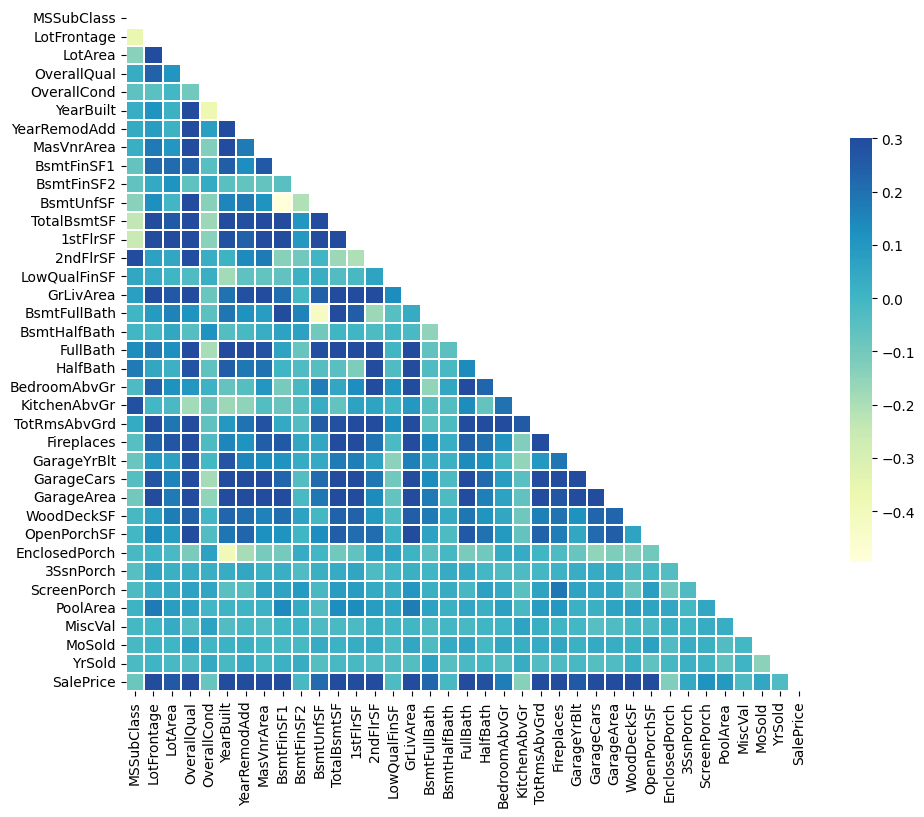

In [5]:
# 4 We can look at the correlation plot using the heatmap() function from the seaborn package:
f, ax = plt.subplots(figsize=(11, 11))

# Generate a mask for the upper triangle
# np.zeros_like - Return an array of zeros with the same shape and type as a given array
# In this case we pass the correlation matrix
# we create a variable “mask” which is a 14 X 14 numpy array
mask = np.zeros_like(pearson, dtype=bool)
tt = np.triu_indices_from(mask)

# We create a tuple with triu_indices_from() by passing the “mask” array
# k is used to offset diagonal
# with k=0, we offset all diagnoals
# If we put k=13, means we offset 14-13=1 diagonal

# triu_indices_from() Return the indices for the upper-triangle of arr.
mask[np.triu_indices_from(mask, k=0)] = True

# First 2 param - anchor hues for negative and positive extents of the map.
# 3rd param - Anchor saturation for both extents of the map
# If true, return a matplotlib colormap object rather than a list of colors.

cmap = sns.diverging_palette(10, 129, s=50, as_cmap=True)

# Adjust size of the legend bar with cbar_kws={“shrink”: 0.5}
# cmap=“YlGnBu” gives the color from Yellow-Green-Blue palette

sns.heatmap(pearson, mask=mask, cmap="YlGnBu", vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": 0.5})

<Axes: xlabel='SalePrice', ylabel='Count'>

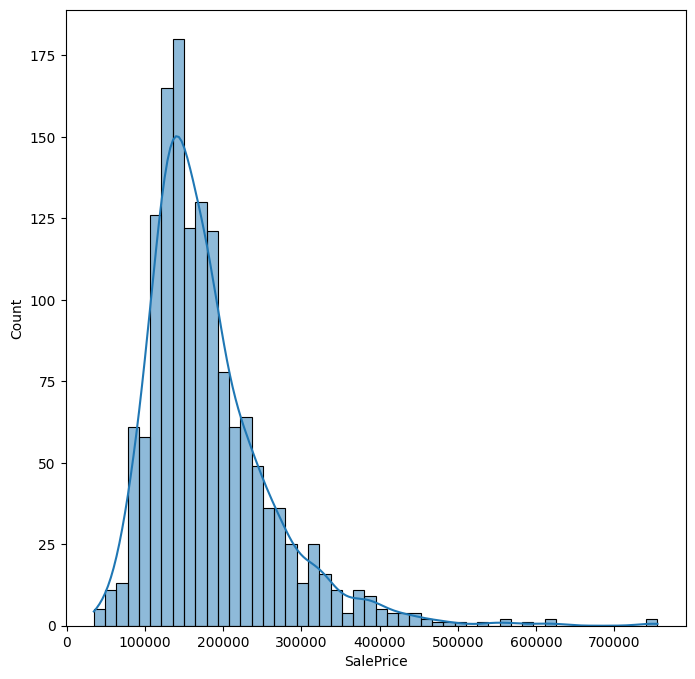

In [6]:
# 5 We can look at the distribution of our target variable, SalePrice, using a histogram with a kernel density estimator as follows:
# Setting the plot size
plt.figure(figsize=(8, 8))

sns.histplot(df_housingdata['SalePrice'], bins=50, kde=True)

In statistics, **kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are based on a finite data sample**. KDE is a technique that provides you with a smooth curve given a set of data. **It can be handy if you want to visualize the shape of some data, as a kind of continuous replacement for the discrete values plotted in a histogram**.

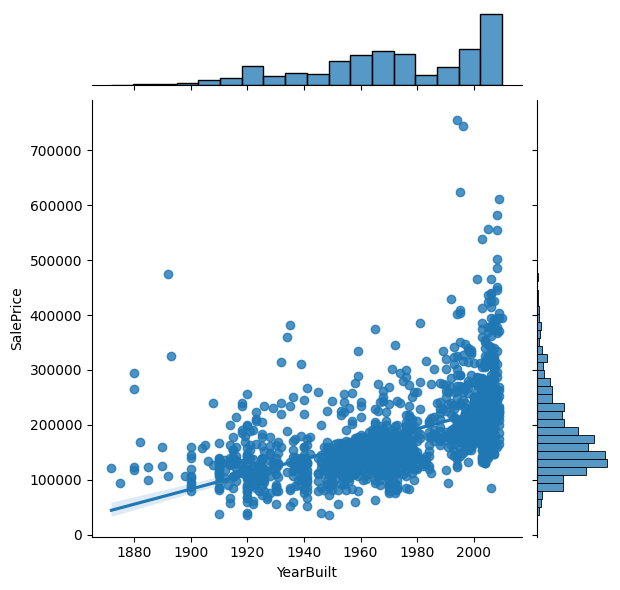

In [7]:
# 6 We can also use JointGrid() from our seaborn package to plot a combination of plots:
from scipy import stats
g = sns.JointGrid(x=df_housingdata['YearBuilt'], y=df_housingdata['SalePrice'])
g = g.plot(sns.regplot, sns.histplot)

With the preceding code, we are able to plot the scatter plot for GarageArea and SalePrice, while also plotting the histogram for each of these variables on each axis:

In [8]:
# 7 Let's now scale our numeric variables using min-max normalization. To do this, we first need to select only the numeric variables from our dataset:
# create a variable to hold the names of the data types viz int16, in32 and so on
num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter out variables with numeric data types
df_numcols_only = df_housingdata.select_dtypes(include=num_cols)

# 8 We will now apply the min-max scaling to our numeric variables:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down the numeric variables
# We exclude SalePrice using iloc() on df_numcols_only DataFrame
df_housingdata_numcols=pd.DataFrame(min_max.fit_transform(df_numcols_only.iloc[:,0:36]), columns=df_numcols_only.iloc[:,0:36].columns.tolist())
df_housingdata_numcols.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [9]:
# 9 Now, we will perform one-hot encoding on our categorical variables:
# We exclude all numeric columns
df_housingdata_catcol = df_housingdata.select_dtypes(exclude=num_cols)

# Steps to one-hot encoding:
# We iterate through each categorical column name
# Create encoded variables for each categorical columns
# Concatenate the encoded variables to the DataFrame
# Remove the original categorical variable
for col in df_housingdata_catcol.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_housingdata_catcol[col],prefix=col)
    df_housingdata_catcol = pd.concat([df_housingdata_catcol,one_hot_encoded_variables],axis=1)
    df_housingdata_catcol.drop([col],axis=1, inplace=True)

# 10 We have now created a DataFrame with only numeric variables that have been scaled. We have also created a DataFrame with only categorical variables that have been encoded. Let's combine the two DataFrames into a single DataFrame:
df_housedata = pd.concat([df_housingdata_numcols, df_housingdata_catcol], axis=1)

# 11 We can then concatenate the SalePrice variable to our df_housedata DataFrame:
# Concatenate SalePrice to the final DataFrame
df_housedata_final = pd.concat([df_housedata, df_numcols_only.iloc[:,36]], axis=1)

# 12 We can create our training and testing datasets using the train_test_split class from sklearn.model_selection:

# We create train & test sample from our dataset
from sklearn.model_selection import train_test_split

# create feature & response variables
X = df_housedata_final.iloc[:, 0:302]
Y = df_housedata_final['SalePrice']

# Create train & test sets
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.30, random_state=1)

# We can create our training and testing datasets using the train_test_split class from sklearn.model_selection:
# Create feature and response variable set
# We create train & test sample from our dataset
from sklearn.model_selection import train_test_split

# create feature & response variables
X = df_housedata_final.iloc[:,0:302]
Y = df_housedata_final['SalePrice']

# Create train & test sets
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.30, random_state=1)

# 13 We can now use SGDRegressor() to build a linear model. We fit this linear model by minimizing the regularized empirical loss with SGD:
import numpy as np
from sklearn.linear_model import SGDRegressor

lin_model = SGDRegressor()

# We fit our model with train data
lin_model.fit(X_train, Y_train)

# We use predict() to predict our values
lin_model_predictions = lin_model.predict(X_test)

# We check the coefficient of determination with score()
print(lin_model.score(X_test, Y_test))

# We can also check the coefficient of determination with
# r2_score() from sklearn.metrics
from sklearn.metrics import r2_score
print(r2_score(Y_test, lin_model_predictions))

-2.0483554494104723e+29
-2.0483554494104723e+29


By running the preceding code, we find out that the coefficient of determination is roughly 0.81.

Note that `r2_score()` takes two arguments. The first argument should be the true values, not the predicted values, otherwise, it would return an incorrect result.

3.824379452573629e+19


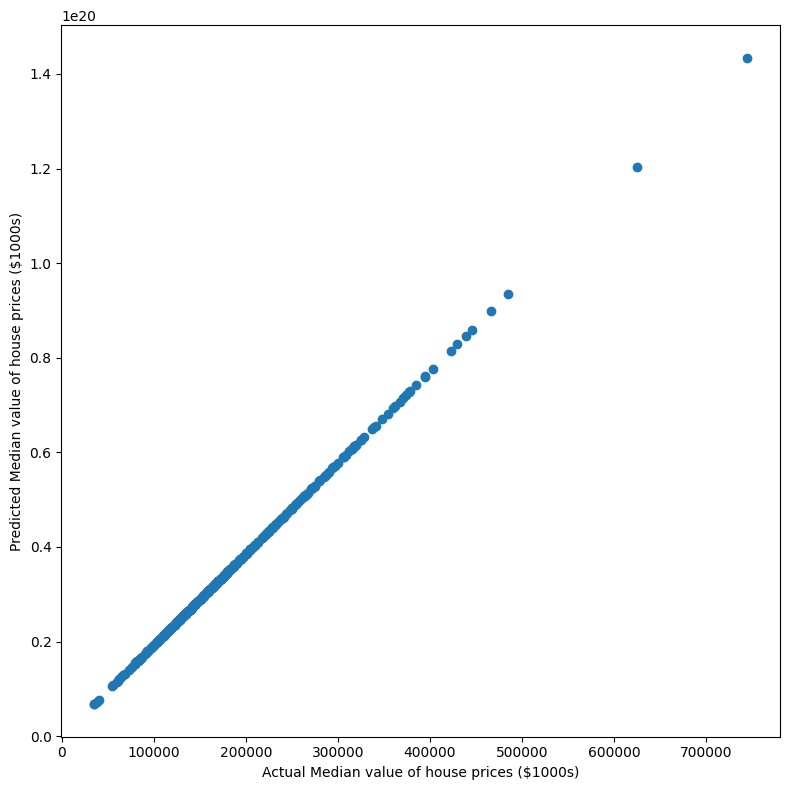

In [10]:
# 14 We check the root mean square error (RMSE) on the test data:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, lin_model_predictions)
rmse = np.sqrt(mse)
print(rmse)

# 15 We now plot the actual and predicted values using matplotlib.pyplot:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, lin_model_predictions)
plt.xlabel('Actual Median value of house prices ($1000s)')
plt.ylabel('Predicted Median value of house prices ($1000s)')
plt.tight_layout()

### How it works

In Step 1, we looked at the variable types. We saw that the dataset had both numeric and non-numeric variables. In Step 2, we used the Pearson method to calculate the pairwise correlation among all the numeric variables. After that, in Step 3, we saw how all of the predictor variables are related to the target variable. We also looked at how to sort correlation coefficients by their absolute values.

In Step 4, we painted a heatmap to visualize the correlation between the variables. Then, we introduced two functions from the NumPy library: `zeros_like()` and `triu_indices_from()`. The `zeros_like()` function takes the correlation matrix as an input and returns an array of zeros with the same shape and type as the given array. `triu_indices_from()` returns the indices for the upper triangle of the array. We used these two functions to mask the upper triangular part of the correlation plot. We called the `heatmap()` function from the seaborn library to paint a correlation heat map and passed our correlation matrix to it. We also set the color of the matrix using `cmap="YlGnBu"` and the size of the legend bar using `cbar_kws={"shrink": 0.5}`.

`numpy.tril_indices_from()` returns the indices for the lower triangle of the array.

In Step 5, we looked at the distribution of the target variable, SalePrice. In Step 6, we used `JointGrid()` from the seaborn library to show how it is possible to plot a scatter plot for two numeric variables with a regression line, along with plotting the distribution of both variables on the axis in the same chart. In Steps 7 and 8, we selected only the numeric variables and scaled the variables using min-max normalization. This scales the values to a numeric range of data between $0$ and $1$. This is also called feature scaling, and is performed using the following formula:

$$
z = \frac{x-x_{min}}{x_{max} - x_{min}}
$$

In Step 9, Step 10, and Step 11, we performed one-hot encoding on the categorical variables and added the encoded variables to the DataFrame. We also dropped the original categorical variables. In Step 12, we split our dataset into a training set and a testing set. In Step 13, we built our linear regression model using `SGDRegressor()` and printed the coefficient of determination. Finally, in Step 14, we plotted the predicted and actual values to see how well our model performed.

### There's more

Consider a linear regression model, given the following hypothesis function:

$$
h(x) = \beta_0 + \beta_1x_1
$$

The formula is as follows:

$$
f(\beta) = \frac{1}{m}(h_{\beta}(x^{(i)}) - y^{(i)})^2
$$

In this formula, $m$ represents the number of training instances, $(x^(i))$ and $(y^(i))$ are the input vector and the target vector for the $i^{th}$ training instance respectively, while $\beta$ represents the parameters or coefficients for each input variable.\
$h_{\beta}(x^{(i)})$ is the predicted value for the $i^{th}$ training instance using the $\beta$ parameters. **The MSE is always non-negative** and the closer it gets to zero, the better.

The MSE is higher when the model performs poorly on the training data. The objective of the learning algorithm, therefore, is to find value of $\beta$ such that the MSE is minimized. This can be represented as follows:

$$
\min_{\beta} f(\beta)
$$

The stochastic gradient descent method finds the values of $\beta$ that minimize the cost function. In order to minimize the cost function, it keeps changing the $\beta$ parameters by calculating the slope of the derivative of the cost function. It starts by initializing the $\beta$ parameters to zero. The $\beta$ parameters are updated at each step of the gradient descent:

$$
update~\beta_i~for~i = (0 \dots n)\{\beta_i := \beta_i - \alpha\frac{\delta}{\delta \beta_i}f(\beta_0, \beta_1)\}
$$

The number of updates required for the algorithm to converge will increase with the increase in the training data. However, as the training data gets larger and larger, it is quite possible for the algorithm to converge much before every instance in the training data is learnt. In other words, the increase in the training data size need not increase the training time needed to train the best possible model where the test error is at its least.

Every training instance will modify $\beta$. The algorithm averages these $\beta$ values to calculate the final $\beta$. $\alpha$ is the learning rate, which tells the algorithm how rapidly to move toward the minimum. A large  might miss the minimum error, while a small $\alpha$ might take a longer time for the algorithm to run.

In the preceding section, we used a `SGDRegressor()` function, but we opted for the default values of the hyperparameters. We are now going to change $\alpha$ to $0.0000001$ and the `max_iter` value to $2000$:

```py
lin_model = SGDRegressor(alpha=0.0000001, max_iter=2000)
```
`max_iter` is an integer value that tells the algorithm the maximum number of passes it can make over the training data. This is also known as the number of epochs.

In our case, the preceding code gives the result that the RMSE drops from $36,459$ to $31,222$ and the coefficient of determination improved from $0.81$ to $0.86$. These results will vary for every iteration.

## Logistic regression

In the previous section, we noted that linear regression is a good choice when the target variable is continuous. We're now going to move on to look at a binomial logistic regression model, which can predict the probability that an observation falls into one of two categories of a dichotomous target variable based on one or more predictor variables. A binomial logistic regression is often referred to as logistic regression.

Logistic regression is similar to linear regression, except that the dependent variable is measured on a dichotomous scale. Logistic regression allows us to model a relationship between multiple predictor variables and a dichotomous target variable. However, unlike linear regression, in the case of logistic regression, the linear function is used as an input to another function, such as $\sigma$:

$$
h_{\beta}(x) = \sigma(\beta^T x)~where~0 \leq h_{\beta} \leq 1
$$

Here $sigma$ is the sigmoid or logistic function. The sigmoid function is given as follows:

$$
\frac{1}{1+e^{-z}}~where~z = \beta^T x
$$

The following graph represents a sigmoid curve in which the values of the y-axis lie between $0$ and $1.$ It crosses the axis at $0.5$. :

![Alt text](logistic_regression.png)

The output, which lies between 0 and 1, is the probability of the positive class. We can interpret the output of our hypothesis function as positive if the value returned is  0.5. Otherwise, we interpret it as negative.

In the case of logistic regression, we use a cost function known as cross-entropy. This takes the following form for binary classification:

$$
cost(h_{\beta}(x), y) = -y.log(h_{\beta}(x)) - (1-y) log(1-h_{\beta}(x))
$$

For $y=1$ and $y=0$, we get the following results

$$
cost(h_{\beta}(x), y) = -y.log(h_{\beta}(x))~if~y=1
$$
$$
cost(h_{\beta}(x), y) = -(1-y)log(1-h_{\beta}(x))~if~y=0
$$

Cross-entropy increases as the predicted probability diverges from the actual label. A higher divergence results in a higher cross-entropy value. In the case of linear regression, we saw that we can minimize the cost using gradient descent. In the case of logistic regression, we can also use gradient descent to update the coefficients and minimize the cost function.

In this recipe, we will use the `SGDClassfier()` implementation of scikit-learn. `SGDClassifier()` implements **regularized linear models with stochastic gradient descent, which, for large datasets, is much faster than gradient descent**. This is because **gradient descent considers the whole training dataset, while stochastic gradient descent only considers one random point while updating the weights.**

> By default, `SGDClassifier` might not perform as well as logistic regression. It is likely to require hyperparameter tuning.

### Getting ready

In this section, we're going to use a dataset that contains information on default payments, demographics, credit data, payment history, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. This dataset is taken from the UCI ML repository and is available at GitHub:

We will start by importing the required libraries:

In [11]:
# import os for operating system dependent functionalilities
import os

# import the other required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Let's read our data. We will prefix the name of the Dataframe with df_ to make if easier to read
df_creditdata = pd.read_csv("UCI_Credit_Card.csv")

### How to do it

In [12]:
# 1 First, we're going to take a look at our dataset using the read_csv() function:
print(df_creditdata.shape)
print(df_creditdata.head())

(30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0 

In [13]:
# 2 We will take a look at the datatypes using dtypes:
df_creditdata.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [14]:
# 3 We will drop the ID column as we do not need this here:
df_creditdata.drop(["ID"], axis=1, inplace=True)

In [15]:
# 4 In the previous section, we saw how to explore correlations among the variables. We will skip this here, but readers are advised to check for correlation as multicollinearity might have an impact on the model.
# 5 However, we will check if there are any null values, as follows:
df_creditdata.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [16]:
# 6 We will then separate the predictor and response variables. We will also split our training and testing data:
# split features & response variable
X = df_creditdata.iloc[:, 0:23]
y = df_creditdata['default.payment.next.month']

# Create train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
# 7 We standardize our predictor variables using StandardScaler():
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# 8 We then move our model using SGDClassifier():
# We create an instance of SGDClassifier()
logistic_model = SGDClassifier(alpha=0.000001, loss='log_loss', max_iter=100000, penalty='l2')

# We fit our model to the data
fitted_model = logistic_model.fit(X_train, y_train)

# We use predict_proba() to predict the probabilities
predictedvalues = fitted_model.predict_proba(X_test)

# We print the probabilities to take a glance
predictedvalues

array([[9.99214719e-01, 7.85281150e-04],
       [3.78130102e-02, 9.62186990e-01],
       [6.93585999e-01, 3.06414001e-01],
       ...,
       [9.99829456e-01, 1.70544109e-04],
       [8.78325984e-02, 9.12167402e-01],
       [9.83784766e-01, 1.62152339e-02]], shape=(9000, 2))

In [18]:
# 9 We separate out the probabilities of one class. In this case, we will look at class 1:
# We take the predicted values of class 1
y_predicted = predictedvalues[:, 1]

# We check to see if the right values have been considered from the predicted values
print(y_predicted)

[7.85281150e-04 9.62186990e-01 3.06414001e-01 ... 1.70544109e-04
 9.12167402e-01 1.62152339e-02]


0.5593930714285714


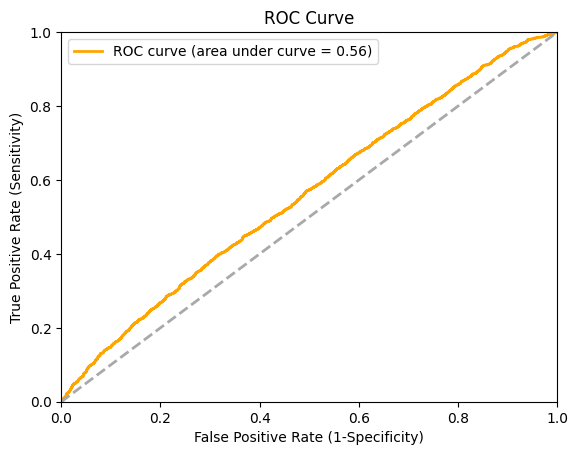

In [19]:
# 10 We check the accuracy of our model on the training data:
# Check for accuracy
logistic_model.score(X_test, y_test)
# 11 We can then see the area under curve (AUC) value of the receiver operating characteristic (ROC) curve:
# We use roc_curve() to generate fpr & tpr values
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

# we pass the fpr & tpr values to auc() to calculate the area under curve
roc_auc = auc(fpr, tpr)
print(roc_auc)
# 12 We plot our ROC curve as follows:
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area under curve = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show()

The model can be improved by tuning the hyperparameters. It can also be improved through feature selection.

## Naive Bayes

The Naive Bayes algorithm is **a probabilistic learning method**. It is known as Naive because it **assumes that all events in this word are independent, which is actually quite rare**. However, in spite of this assumption, the Naive Bayesian algorithm has proven over time to provide great performance in terms of its prediction accuracy.

**The Bayesian probability theory is based on the principle that the estimated likelihood of an event or a potential outcome should be based on the evidence at hand across multiple trials**. Bayes’ theorem provides a way to calculate the probability of a given class, given some knowledge about prior observations.

This can be written as follows:

![Alt text](naive_bayes.png)

The different elements of this theorem can be explained as follows:

* **p(class|observation)**: This is the probability that the class holds given the observation.
* **P(observation)**: This is the prior probability that the training data is observed.
* **p(class)**: This is the prior probability of the class.
* **p(observation|class)**: This is the probability of the observations given that the class holds.

In other words, if H is the space for the possible hypothesis, the most probable hypothesis, classH, is the one that maximizes **p(class|observation)**.

Given a new observation with attributes $(a_1, a_2, a_3, \dots, a_4)$, the bayes algorithm, given a new observation with attributes $(a_1, a_2, a_3, \dots, a_n$, the Bayes algorithm classifies it as the most probable value:
$$
class_{map} = \argmax_{class \in H} P(class|a_1, a_2, a_3, \dots a_n) = argmax P(a_1, a_2, a_3, \dots, a_n|class)
$$

$$
p(a_1, a_2, a_3, \dots, a_n|class) = p(a_1|class).p(a_2|class).p(a_3|class)\dots p(a_n|class)
$$

The prediction of the Naive Bayesian Classifier is as follows:

$$
class_{NB} = \argmax_{class \in H} P(class) \prod^{n}_{i=1}P(a_1, a_2, a_3 \dots a_n | class)
$$

### Getting ready

A Naive Bayes classifier is one of the most basic algorithms that can be applied in text classification problems.

One column holds messages and the other column holds the message type, which states whether it is a spam message or a ham message. We will apply the Naive Bayes technique to predict whether a message is likely to be spam or ham.

In [20]:
# We will start by importing the required libraries:

# import os for operating system dependent functionalities
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [21]:
# Let's read our data. As we did in the previous sections, we will prefix the name of the DataFrame with df_ so that we can read it easily:

df_messages = pd.read_csv('spam.csv', encoding='latin-1', sep=',', names=['labels','message'])

### How to do it

In [22]:
# Let's now move on to look at how to build our model.

# 1 After reading the data, we use the head() function to take a look it:
df_messages.head(3)

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [23]:
# 2 We then use the describe() function to look at a few metrics in each of the columns:
df_messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


For the object datatype, the result of `describe()` will provide `metrics`, `count`, `unique`, `top`, and `freq.top` refers to the most common value, while freq is the frequency of this value.

In [24]:
# 3 We can also take a look at the metrics by message type, as follows:
df_messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [25]:
# 4 To analyze our dataset even further, let's take a look at the word count and the character count for each message:
df_messages['word_count'] = df_messages['message'].apply(lambda x: len(str(x).split(" ")))
df_messages['character_count'] = df_messages['message'].str.len() 

df_messages[['message','word_count', 'character_count']].head()

,message,word_count,character_count
0,"Go until jurong point, crazy.. Available only ...",20,111
1,Ok lar... Joking wif u oni...,6,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,U dun say so early hor... U c already then say...,11,49
4,"Nah I don't think he goes to usf, he lives aro...",13,61


The lambda function is used to create small, anonymous functions in Python. A lambda function can take any number of arguments, but can only have one expression. This function is passed as a parameter to other functions, such as `map`, `apply`, `reduce`, or `filter`.

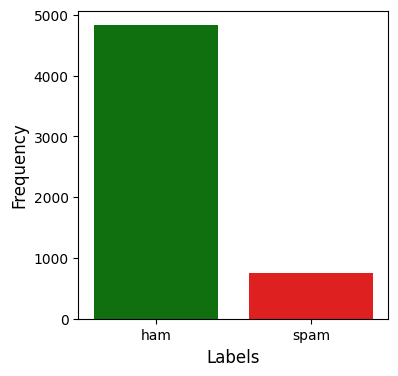

In [28]:
# 5 In this case, labels is our target variable. We have two classes: spam and ham. We can see the distribution of spam and ham messages using a bar plot:
# spam and ham should be in different colors
# labels_count = pd.DataFrame(df_messages.groupby('labels')['message'].count())
# labels_count.reset_index(inplace=True)
# plt.figure(figsize=(4, 4))
# sns.barplot(data=labels_count, x='labels', y='message', palette={'spam': 'red', 'ham': 'green'})
# plt.ylabel('Frequency', fontsize=12)
# plt.xlabel('Labels', fontsize=12)
# plt.show()
labels_count = pd.DataFrame(df_messages.groupby('labels')['message'].count())
labels_count.reset_index(inplace=True)
plt.figure(figsize=(4, 4))
sns.barplot(data=labels_count, x='labels', y='message', hue='labels', palette={'spam': 'red', 'ham': 'green'}, legend=False)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Labels', fontsize=12)
plt.show()


In [29]:
# 6 In the following code block, we will label spam as 1, and ham as 0:
# create a variable that holds a key-value pair for ham and spam
class_labels = {"ham":0, "spam":1}

# use the class_labels variable with map()
df_messages['labels']=df_messages['labels'].map(class_labels)
df_messages.head()

,labels,message,word_count,character_count
0,0,"Go until jurong point, crazy.. Available only ...",20,111
1,0,Ok lar... Joking wif u oni...,6,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,0,U dun say so early hor... U c already then say...,11,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61


In [30]:
# 7 We will now split our data into training and testing samples:
# Split your data into train & test set
X_train, X_test, y_train, y_test = train_test_split(df_messages['message'],\
                                                                df_messages['labels'], test_size=0.2, random_state=1)
# 8 We need to convert the collection of messages to a matrix of token counts. This can be done using CountVectorizer():
# Creating an instance of the CountVectorizer class
# If ‘english’, a built-in stop word list for English is used.
# There are known issues with ‘english’ and you should consider an alternative
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word')

# Learn a vocabulary from one or more message using the fit_transform() function
vect_train = vectorizer.fit_transform(X_train)

# 9 We proceed to build our model with the Naive Bayes algorithm:
# Create an instance of MultinomialNB()
model_nb = MultinomialNB()

# Fit your data to the model
model_nb.fit(vect_train, y_train)

# Use predict() to predict target class
predict_train = model_nb.predict(vect_train)

# 10 We load the required libraries for the evaluation metrics, as follows:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# 11 We now check our accuracy by evaluating the model with the training data:
# Calculate Train Accuracy
print('Accuracy score: {}'.format(accuracy_score(y_train, predict_train)))

# Calculate other metrics on your train results
print('Precision score: {}'.format(precision_score(y_train, predict_train)))
print('Recall score: {}'.format(recall_score(y_train, predict_train)))
print('F1 score: {}'.format(f1_score(y_train, predict_train)))

Accuracy score: 0.9948395781916087
Precision score: 0.9802955665024631
Recall score: 0.9819078947368421
F1 score: 0.981101068200493


In [31]:
# 12 Now we check the accuracy of our test data by evaluating the model with the unseen test data:
# We apply the model into our test data
vect_test = vectorizer.transform(X_test)
prediction = model_nb.predict(vect_test)

# Calculate Test Accuracy
print('Accuracy score: {}'.format(accuracy_score(y_test, prediction)))

# Calculate other metrics on your test data
print('Precision score: {}'.format(precision_score(y_test, prediction)))
print('Recall score: {}'.format(recall_score(y_test, prediction)))
print('F1 score: {}'.format(f1_score(y_test, prediction)))

Accuracy score: 0.9874439461883409
Precision score: 0.9496402877697842
Recall score: 0.9496402877697842
F1 score: 0.9496402877697842


### There's more

The Naive Bayes algorithm comes in multiple variations. These include the Multivariate Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Multinomial Naive Bayes algorithms. These variations can be applied to solve different problems.

* **Multivariate Bernoulli Naive Bayes**: This algorithm is used when the feature vectors provide a binary representation of whether a word or feature occurs in the document or not. Every token in the feature vector of a document is associated with either the 1 or 0 values. 1 represents a token in which the word occurs, and 0 represents a token in which the word does not occur. The Multivariate Bernoulli Naive Bayes algorithm can be used in situations in which the absence of a particular word matters, such as in the detection of spam content.
* **Multinomial Naive Bayes**: This is used when multiple occurrences of words are to be considered in classification problems. In this variation, text documents are characterized by the frequency of the term, instead of binary values. Frequency is a discrete count that refers to how many times a given word or token appears in a document. The Multinomial Naive Bayes algorithm can be used for topic modeling, which is a method for finding a group of words that best represent the key information in a corpus of documents.
* **Gaussian Multinomial Naive Bayes**: In scenarios where we have continuous features, one way to deal with continuous data in Naive Bayes classifications is to discretize the features. Alternatively, we can apply the Gaussian Multinomial Naive Bayes algorithm. This assumes the features follow a normal distribution and uses a Gaussian kernel to calculate the class probabilities.

## Decision trees

Decision trees, **a non-parametric supervised learning method, are popular algorithms used for predictive modeling**. The **most well-known decision tree algorithms** include the **iterative dichotomizer (ID3), C4.5, CART, and C5.0**. <font color=yellow>**ID3** is only applicable for categorical features</font>. <font color=yellow>**C4.5** is an improvement on **ID3** and **has the ability to handle missing values and continuous attributes**</font>. The **tree-growing process involves finding the best split at each node using the information gain**. However, <font color=yellow>the **C4.5** algorithm **converts a continuous attribute into a dichotomous categorical attribute by splitting at a suitable threshold value that can produce maximum information gain**</font>.

Leo Breiman, a distinguished statistician, introduced a decision tree algorithm called the **Classification and Regression Tree (CART)**. CART, unlike ID3 and C4.5, **can produce decision trees that can be used for both classification and regression problems**. **This algorithm also forms the basis for the important random forest algorithm**.

Decision trees are built using recursive partitioning, which splits the data into subsets based on several dichotomous independent attributes. This recursive process may split the data multiple times until the splitting process terminates after a particular stopping criterion is reached. The best split is the one that maximizes a splitting criterion. For classification learning, the techniques used as the splitting criterion are entropy and information gain, the Gini index, and the gain ratio. For regression tasks, however, standard deviation reduction is used.

The C4.5 and C5.0 algorithms use entropy (also known as Shannon entropy) and information gain to identify the optimal attributes and decide on the splitting criterion. Entropy is a probabilistic measure of uncertainty or randomness.

Mathematically, entropy can be expressed as follows:

$$
\text{Entropy} = \sum^n_{i-1}-p_i\log_2(p_i)
$$

In the case of a two-class attribute, entropy can range from $0$ to $1$. For an n-class attribute, entropy can take values between $0$ to $log_2(n$. For a homogeneous variable, where there is just a single class, the entropy would be zero because the probability of that class being zero is $1$ and $log_2(1)=0$.

To use entropy to identify the most identified attributes at which to split, the algorithm calculates the change in homogeneity that would result from the split at each possible attribute. This change is known as information gain.

Constructing a decision tree is all about finding the attribute that returns the highest information gain. This information gain is based on the decrease in entropy after a dataset is split at an attribute.

Information gain is calculated as the difference between the entropy before the split and the entropy after the split:
$$
\text{Information gain} = \text{Entropy}(S_{\text{Before Split}}) - \text{Entropy}(S_{\text{After Split}})
$$
The higher the information gain, the better a feature is. Information gain is calculated for all features. The algorithm chooses the feature with the highest information gain to create the root node. The information gain is calculated at each node to select the best feature for that node.

> Information gain is also known as Kullback-Leibler divergence. This measures the difference between two probability distributions over the same variable. Put simply, if you have two probability distributions, the KL divergence measures the similarity of the two distributions. If the KL divergence is 0, the two distributions are equal.

The Gini index is a measure of the degree of impurity and can also be used to identify the optimal attributes for the splitting criterion. It is calculated as follows:

$$
\text{Gini} = 1 -\sum^n_{i-1}p^2_i
$$

In the preceding formula, $p$ is the probability of a training instance belonging to a particular class. With regards to the Gini index, the lower the impurity, the better it is.

### Getting ready

To build our model with q decision tree algorithm, we will use the backorders.csv file, which can be downloaded from the following GitHub.

This dataset has 23 columns. The target variable is `went_on_backorder`. This identifies whether a product has gone on back order. The other 22 variables are the predictor variables. A description of the data is provided in the code that comes with this book:

In [34]:
# 1 # import os for operating system dependent functionalities
import os

# import other required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt

df_backorder = pd.read_csv("backorders.csv")

### How to do it

In [35]:
# 1 First, we want to look at the dimensions of the dataset and the data using the shape
# and head() functions. We also take a look at the statistics of the numeric variables using describe():
print(df_backorder.shape)
df_backorder.head()

(61589, 23)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [36]:
df_backorder.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,6.158900e+04,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,4.196427e+02,43.087256,1.605400,-6.264182,-5.863664,1.205361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,1.269858e+04,959.614135,42.309229,25.537906,24.844514,29.981155
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.640000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.820000,0.800000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,5.100000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


In [37]:
# If you get your output in scientific notation, you can change to view it 
# in standard form instead by executing the following command: pd.options.display.float_format = ‘{:.2f}’.format
# 2 With dtypes, we get to see the data types of each of the variables:
df_backorder.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [38]:
# 3 We can see that sku is an identifier and will be of no use to us for our model-building exercise. We will, therefore, drop sku from our DataFrame as follows:
df_backorder.drop('sku', axis=1, inplace=True)
# 4 We can check whether there are any missing values with the isnull().sum() command:
df_backorder.isnull().sum()

national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [39]:
# 5 Since the number of missing values in the lead_time variable is about 5%, we will
# remove all the observations where lead_time is missing for our initial analysis:
df_backorder = df_backorder.dropna(axis=0)
# 6 We now need to encode our categorical variables. We select only the categorical variables
# and call pd.get_dummies() to dummy-code the non-numeric variables:
non_numeric_attributes = df_backorder.select_dtypes(include=['object']).columns
df_backorder = pd.get_dummies(columns=non_numeric_attributes, data=df_backorder, prefix=non_numeric_attributes, prefix_sep="_",drop_first=True)
df_backorder.dtypes

national_inv               int64
lead_time                float64
in_transit_qty             int64
forecast_3_month           int64
forecast_6_month           int64
forecast_9_month           int64
sales_1_month              int64
sales_3_month              int64
sales_6_month              int64
sales_9_month              int64
min_bank                   int64
pieces_past_due            int64
perf_6_month_avg         float64
perf_12_month_avg        float64
local_bo_qty               int64
potential_issue_Yes         bool
deck_risk_Yes               bool
oe_constraint_Yes           bool
ppap_risk_Yes               bool
stop_auto_buy_Yes           bool
rev_stop_Yes                bool
went_on_backorder_Yes       bool
dtype: object

In [48]:
# 7 We will then look at our target variable distribution as follows:
# Target variable distribution
pd.Series(df_backorder['went_on_backorder_Yes']).value_counts()

went_on_backorder_Yes
False    47217
True     10969
Name: count, dtype: int64

In [49]:
# 8 We will now split our data into training and testing datasets:
# Performing train test split on the data
X, y = df_backorder.loc[:,df_backorder.columns!='went_on_backorder_Yes'].values, df_backorder.loc[:,'went_on_backorder_Yes'].values

# Split our dataset into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# 9 We will build our first model with DecisionTreeClassifier():
# Create an instance of DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier(random_state=1)

# Fit our model to the data
model_DT_Gini = classifier.fit(X_train, y_train)
model_DT_Gini

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
# 10 We can use the model to predict our class labels using both our training and our testing datasets:
# Predict with our test data
test_predictedvalues = model_DT_Gini.predict(X_test)

# Check accuracy
acc = accuracy_score(y_test, test_predictedvalues)
print("Accuracy is", acc)

# Check TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_predictedvalues).ravel()
print("TN:", tn, " FP:", fp, " FN:", fn, " TP:", tp)

Accuracy is 0.9009279945007733
TN: 8784  FP: 655  FN: 498  TP: 1701


<Figure size 640x480 with 0 Axes>

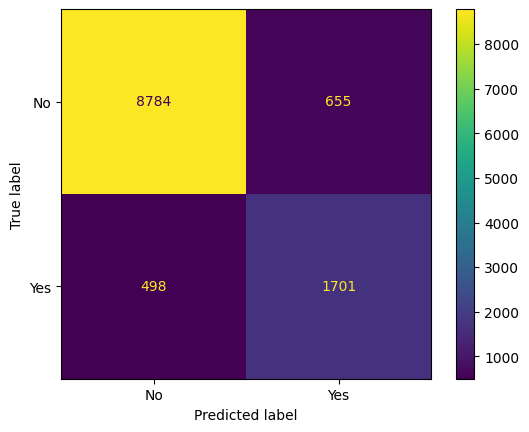

In [51]:
# 11 We will now use a plot_confusion_matrix function to plot our confusion matrix.
# This function is taken from http://scikit-learn.org and is readily available there,
# so we won't show this function here. It is, however, provided with the code in the book for your reference:
from sklearn.metrics import ConfusionMatrixDisplay


target_names = [ 'No', 'Yes']

#Pass Actual & Predicted values to confusion_matrix()
cm = confusion_matrix(y_test, test_predictedvalues)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

In [52]:
# 12 We can change the hyperparameters to tune our model. We can also perform a grid search to find the hyperparameter values that supply optimum results. We can use the following code to set the hyperparameter values:
# set the parameters for grid search
grid_search_parameters = {
    "criterion": ["gini", "entropy"], 
    "min_samples_split": [2], 
    "max_depth": [None, 2, 3], 
    "min_samples_leaf": [1, 5],
    "max_leaf_nodes": [None],
}

# 13 We will use GridSearchCV() to grid search the parameters:
from sklearn.model_selection import GridSearchCV

# Create an instance of DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier()

# Use GridSearchCV(), pass the values you have set for grid search
model_DT_Grid = GridSearchCV(classifier, grid_search_parameters, cv=10)
model_DT_Grid.fit(X_train, y_train)

# 14 After running the preceding command, we can see the best parameter values among those provided using best_params_:
model_DT_Grid.best_params_ 

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Accuracy is 0.9009279945007733
TN: 8819  FP: 620  FN: 499  TP: 1700


<Figure size 640x480 with 0 Axes>

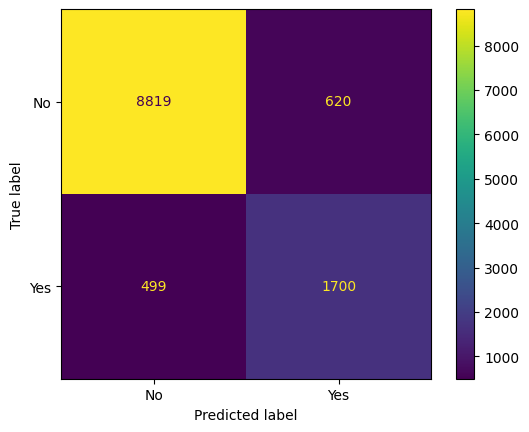

In [53]:
# 15 You can use the model that is selected using the GridSearchCV() function:
test_predictedvalues = model_DT_Grid.predict(X_test)

cc = accuracy_score(y_test, test_predictedvalues)
print("Accuracy is", acc)

tn, fp, fn, tp = confusion_matrix(y_test, test_predictedvalues).ravel()
print("TN:", tn, " FP:", fp, " FN:", fn, " TP:", tp)

cm = confusion_matrix(y_test, test_predictedvalues)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

In [54]:
# 16 In order to see the metrics per-label, we can also use the classification_report, as follows:
from sklearn.metrics import classification_report

target_names = [ 'No', 'Yes']
print(classification_report(y_test, test_predictedvalues, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.93      0.94      9439
         Yes       0.73      0.77      0.75      2199

    accuracy                           0.90     11638
   macro avg       0.84      0.85      0.85     11638
weighted avg       0.91      0.90      0.90     11638



### There's more

Sometimes, a model can classify training data perfectly but faces difficulty when working with new data. This problem is known as **overfitting**. The model fails to generalize to the new test data.

**We allow a recursive splitting process to repeat until we terminate the leaf node because we cannot split the data further**. This model would fit the training data perfectly but leads to poor performance. For this reason, **tree-based models are susceptible to overfitting**. To overcome this, **we need to control the depth of our decision tree**.

There are multiple ways to avoid overfitting. One method is to **terminate the growth before a perfect classification of the training data is made**. The following approaches can be adopted to implement this stopping method:

* **Stop when a tree reaches the maximum number of levels**
* **Stop when a subset contains fewer than a defined number of training instances**
* **Stop when the minimum information gain is reached**

Another method is to **allow the data to overfit, and then to prune the tree after it is constructed. This involves eliminating nodes that are not clearly relevant, which also minimizes the size of the decision tree**.

## Support vector machines

A **support vector machine (SVM)** is a popular machine learning algorithm for supervised learning. It **can be used for both classification and regression problems**. In **classification learning, SVM performs classifications by finding an optimal separating hyperplane that differentiates two classes of observations**. If the data is ***linearly separable and one-dimensional, we may have a point that separates the data. In two-dimensional space, the data can be separated by a straight line, while a plane separates data in three-dimensional space. When we have more than three dimensions, this is called a hyperplane.***

For a **linear SVM**, a dataset $X$ with $n$ feature vectors is represented as follows:

$$
\text{X} = \{x_1, x_2, x_3, \dots, x_n\}\text{ where }x_i \in \R^m
$$

A bipolar target variable $Y$ is written as follows:

$$
\text{Y} = \{y_1, y_2, y_3, \dots, y_m\} \text{ where }y_i \in \{-1, +1\}
$$

The hyperlane is given by the following:

$$
w^T.x + b = 0~where~w^t = \{w_1, w_2, w_3, \dots, w_n\}^T
$$

For an SVM, the two classes are represented as $-1$ and $+1$ instead of $1$ and $0$. The hyperplane can, therefore, be written as follows:

$$
f(x) = sign(w^T.x+b)
$$

To classify the data, we have we have the following two rules:

$$
w^T.x + b > 0\text{ for }y_i = +1
$$
$$
w^T.x + b < 0\text{ for }y_i = -1
$$

However, **it's quite possible that there are a lot of hyperplanes that correctly classify the training data**. There might be **infinite solutions of $w$ and $b$ that hold for the preceding rules**. An algorithm such as a perceptron learning algorithm will just find any linear classifier. SVM, however, finds the optimal hyperplane, which is at a maximum distance from any data point. The further the data points lie from the hyperplane, the more confident we are that they have been correctly classified. We would therefore like the data points to be as far away from the hyperplane as possible, while still being able to classify them correctly. The best hyperplane is the one that has the maximum margin between the two classes. This is known as the maximum-margin hyperplane.

It's possible for SVM to choose the most important vectors that define the separation hyperplane from the training data. These are the data points that lie closest to the hyperplane and are known as support vectors. Support vectors are the data points that are hardest to classify. At the same time, these represent high-quality data. If you remove all the other data points and use only the support vectors, you can get back the exact decision hyperplane and the margin using the same SVM model. The number of data points does not really matter, just the support vectors.

We normalize the weights w and b so that the support vectors satisfy the following condition:

$$
|w^T.x + b| = 1
$$

As a result, the classification rules change to the following:
$$
w^T.x + b \geq +1 \text{ for }y_i = +1
$$
$$
w^T.x + b \leq -1 \text{ for }y_i = -1
$$

The preceding equation can be combined and represented as follows

$$
y_i(w^T.x+b) \geq 1 \text{ for } y_i = +1 \text{ or } -1
$$

The initial SVM algorithms could only be used in the case of linearly separable data. These are known as hard-margin SVMs. However, hard-margin SVMs can work only when the data is completely linearly separable and if doesn't have any noise. In the case of noise or outliers, a hard-margin SVM might fail.

Vladimir Vapnik proposed soft-margin SVMs to deal with data that is non-linearly separable by using slack variables. Slack variables allows for errors to be made while fitting the model to the training dataset. In hard-margin classification, we will get a decision boundary with a small margin. In soft-margin classification, we will get a decision boundary with a larger margin:

![Alt text](hyperplans.png)

SVMs can also perform non-linear classification extremely well using something called a kernel trick. This refers to transformations in which the predictor variables are implicitly mapped to a higher-dimensional feature space. Popular kernel types include the following:

* Linear kernels
* Polynomial kernels
* Radial basis function (RBF) kernels
* Sigmoid kernels

Different kernel functions are available for various decision functions. We can add kernel functions together to achieve even more complex planes.

### Getting ready

In [55]:
# import os for operating system dependent functionalities
import os

# import other required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

df_bankdata = pd.read_csv("bank.csv")

### How to do it

In [56]:
# 1 With the following command, we can see that we have ten categorical variables and seven numerical variables in the dataset:
df_bankdata.dtypes
# 2 With the following command, we notice there are no missing values, so we can proceed with our next steps:
df_bankdata.isnull().sum()
# 3 We can check the class balance in our target variable as follows:
print("Total number of class labels: {}".format(df_bankdata.shape[0]))
print("Number of people opted for Term Deposit: {}".format(df_bankdata[df_bankdata.y == 'yes'].shape[0]))
print("Number of people not opted for Term Deposit: {}".format(df_bankdata[df_bankdata.y == 'no'].shape[0]))
# 4 We can convert our target class to the binary values 1 and 0 with the following command:
df_bankdata['y'] = (df_bankdata['y']=='yes').astype(int)
# 5 We can now perform one-hot encoding on our categorical variables. We only select variables that are categorical in nature. In the following code, we use category_column_names to provide the names of the non-numeric variables:
# Using select_dtypes() to select only the non-numerical type variable
column_type = ['object']
df_bank_data_category_cols = df_bankdata.select_dtypes(column_type)

# This will give you the names of the non-numerical variables
category_column_names = df_bank_data_category_cols.columns.values.tolist()
category_column_names

Total number of class labels: 4521
Number of people opted for Term Deposit: 521
Number of people not opted for Term Deposit: 4000


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [57]:
# 6 We run a loop over each of the non-numerical variables to perform one-hot encoding
# on them and add them back to the DataFrame. We will also delete the original non-numerical
# variables after performing one-hot encoding:
for each_col in category_column_names:
    dummy_var = pd.get_dummies(df_bank_data_category_cols[each_col], prefix=each_col)
    df_joindata = df_bankdata.join(dummy_var)
    df_joindata.drop([each_col], axis=1, inplace=True)
    df_bankdata = df_joindata
# 7 We separate the predictor and response variables as follows:
# Separate features & response variable
X = df_bankdata.iloc[:, :-1]
y = df_bankdata['y']

# 8 We also split our data into training and testing datasets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
# 9 We then build our first model using SVC with the default kernel, radial basis function (RBF):
# Note, you need not pass kernel='rbf' to the SVC() because its the default
svc_model = SVC(kernel='rbf') 
svc_model.fit(X_train, y_train)

# 10 We check our training and testing accuracy via the SVC model built with the RBF kernel:
train_predictedvalues = svc_model.predict(X_train)
test_predictedvalues = svc_model.predict(X_test)

print('Train Accuracy Score:')
print(accuracy_score(y_train, train_predictedvalues))

print('Test Accuracy Score:')
print(accuracy_score(y_test, test_predictedvalues))

Train Accuracy Score:
0.8877212389380531
Test Accuracy Score:
0.8729281767955801


In [59]:
# 11 We can rebuild our SVC model with a polynomial kernel as follows:
svc_model =SVC(kernel='poly') 
svc_model.fit(X_train, y_train)

train_predictedvalues=svc_model.predict(X_train)
test_predictedvalues=svc_model.predict(X_test)

print('Train Accuracy Score:')
print(accuracy_score(y_train,train_predictedvalues))

print('Test Accuracy Score:')
print(accuracy_score(y_test,test_predictedvalues))

Train Accuracy Score:
0.8877212389380531
Test Accuracy Score:
0.8729281767955801


In [60]:
# 12 We can also build an SVC model with the linear kernel. Instead of kernel='ploy', we can replace this with kernel='linear' in the preceding code:
svc_model = SVC(kernel='linear') 
svc_model.fit(X_train, y_train)

train_predictedvalues=svc_model.predict(X_train)
test_predictedvalues=svc_model.predict(X_test)

print('Train Accuracy Score:')
print(accuracy_score(y_train,train_predictedvalues))

print('Test Accuracy Score:')
print(accuracy_score(y_test,test_predictedvalues))

Train Accuracy Score:
0.9972345132743363
Test Accuracy Score:
0.994475138121547


### There's more

In this exercise, we have seen how to use various kernels in our code. Kernel functions must be symmetrical. Preferably, they should have a positive (semi) definite gram matrix. A gram matrix is the matrix of all the possible inner products of V, where V is the set of m vectors. For convenience, we consider positive semi-definite and positive-definite functions indifferently. In practice, a positive definiteness of kernel matrices ensures that kernel algorithms converge to a unique solution.

A linear kernel is the simplest of all kernels available. It works well with text classification problems.

A **linear kernel** is presented as follows:

$$
\text{K}(x,y) = x^Ty + c
$$

Here, $c$ is the constant term.

A polynomial kernel has two parameters: **a constant and the degree**. A polynomial kernel with no constant and a degree of $1$ is simply a linear kernel. <span style="color: red;">As the degree of the polynomial kernel increases, the decision function becomes more complex</span>. With higher degrees, it is possible to get good training accuracy, but the model might fail to generalize to unseen data, leading to overfitting. The polynomial kernel is represented as follows:

$$
\text{K}(x, y) = (\alpha x^T + c)^d
$$
Here, $\alpha$ is the slope, $d$ is the degree of the kernel, and $c$ is the constant term.

The **radial basis function kernel (RBF)**, also known as the Gaussian kernel, is a more complicated kernel and can outperform polynomial kernels. The RBF kernel is given as follows:

$$
\text{K}(x, y) = \exp(-\gamma||x-y||^2)
$$

The $\gamma$ parameter can be tuned to increase the performance of the kernel. This is important: with an over-estimated $\gamma$, the kernel can lose its non-linear power and behave more linearly. On the other hand, if $\gamma$ is underestimated, the decision unction can be highly sensitive to noise in the training data.

Not all kernels are strictly positive-definite. The sigmoid kernel function, though is quite widely used, is not positive-definite. The sigmoid function is given as follows:

$$
K(x, y) = \tanh(\alpha x^T y + c)
$$
Here, $\alpha$ is the slope and $c$ is the constant term. Note that an SVM with a sigmoid kernel is the same as a two-layer perceptron neural network.

Adding a kernel trick to an SVM model can give us new models. How do we choose which kernel to use? The first approach is to try out the RBF kernel, since it works pretty well most of the time. However, it is a good idea to use other kernels and validate your results. Using the right kernel with the right dataset can help you build the best SVM models.